<a href="https://colab.research.google.com/github/tanvi-ap/DEVINSC/blob/main/devinsc_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re


nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv('/drive/MyDrive/combined_messages.csv')
data

,Unnamed: 0,message,type
0,0,Add parameterized queries to protect against m...,XSS
1,1,Replace malicious sql query\n\nLet's show an a...,XSS
2,2,Escaped query values to prevent SQL injection ...,XSS
3,3,setup a defence for malicious SQL injection,XSS
4,4,ecure/prevent sql malicious injection,XSS
...,...,...,...
16095,16095,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
16096,16096,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
16097,16097,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
16098,16098,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess


In [ ]:
df= pd.DataFrame(data)
df = df[ df["type"].isin(['XSS','SQLI','ImproperAccess']) ][["type","message"]]
## rename columns
df = df.rename(columns={"type":"y", "message":"text"})
## print 5 random rows
df.sample(5)


,y,text
13909,ImproperAccess,Added flash-2021-0527-apt-actors-exploiting-fo...
7572,SQLI,MAGETWO-46920: SQLi Vulnerability
1765,XSS,Fixed XSS vulnerabilities in the `letter` para...
11967,ImproperAccess,DB: 2021-03-20\n\n20 changes to exploits/shell...
4024,XSS,Fix CVE-2015-7364\n\nCross-Site Request Forger...


In [ ]:
df=df.drop_duplicates(subset=['text'])
df.shape

(1425, 2)

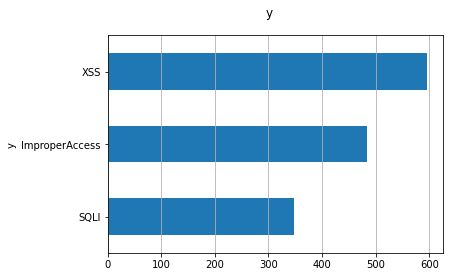

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
df["y"].reset_index().groupby("y").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
#lst_stopwords

In [ ]:
df["text_clean"] = df["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

,y,text,text_clean
0,XSS,Add parameterized queries to protect against m...,add parameterized query protect malicious sql ...
1,XSS,Replace malicious sql query\n\nLet's show an a...,replace malicious sql query let show actual at...
2,XSS,Escaped query values to prevent SQL injection ...,escaped query value prevent sql injection inse...
3,XSS,setup a defence for malicious SQL injection,setup defence malicious sql injection
4,XSS,ecure/prevent sql malicious injection,ecureprevent sql malicious injection


In [ ]:
X_Train = [x[0:] for x in df['text_clean']]
#Y_train = [y[1:] for y in df['y']] # Label
X_Train

In [ ]:
labels = df['y'].unique()
#labels
Y_train=[y[0:] for y in labels]
Y_train

['XSS', 'SQLI', 'ImproperAccess']

In [ ]:
import numpy as np


class Embeddings():
    """
    A class to read the word embedding file and to create the word embedding matrix
    """

    def __init__(self, path, vector_dimension):
        self.path = path 
        self.vector_dimension = vector_dimension
    
    @staticmethod
    def get_coefs(word, *arr): 
        return word, np.asarray(arr, dtype='float32')

    def get_embedding_index(self):
        embeddings_index = dict(self.get_coefs(*o.split(" ")) for o in open(self.path, errors='ignore'))
        return embeddings_index

    def create_embedding_matrix(self, tokenizer, max_features):
        """
        A method to create the embedding matrix
        """
        model_embed = self.get_embedding_index()

        embedding_matrix = np.zeros((max_features + 1, self.vector_dimension))
        for word, index in tokenizer.word_index.items():
            if index > max_features:
                break
            else:
                try:
                    embedding_matrix[index] = model_embed[word]
                except:
                    continue
        return embedding_matrix

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)

In [ ]:
tokenizer.word_index

In [ ]:
embedding = Embeddings(
  '/drive/MyDrive/mini_embeddings.txt', 
  vector_dimension=2
)
embedding_matrix = embedding.create_embedding_matrix(tokenizer,1495)

In [ ]:
tokenizer.texts_to_sequences(X_Train)

[[9, 5235, 324, 1742, 41, 11, 10],
 [621, 41, 11, 324, 1591, 408, 6375, 131, 779, 1345, 244],
 [2229, 324, 302, 85, 11, 10, 9964, 41, 302, 362],
 [1592, 5236, 41, 11, 10],
 [9965, 11, 41, 10],
 [9966,
  6376,
  19,
  1947,
  9967,
  207,
  290,
  2752,
  422,
  2938,
  27,
  2753,
  1743,
  11,
  10,
  41,
  2939,
  20,
  6376,
  2582],
 [6377,
  19,
  4323,
  27,
  1948,
  1436,
  1377,
  2940,
  1170,
  1346,
  93,
  2111,
  391,
  1948,
  152,
  952,
  2940,
  1648,
  1194,
  4324,
  244,
  244,
  3859,
  152,
  1744,
  23,
  1377,
  1170,
  4325,
  4324,
  363,
  3479,
  1593,
  299,
  1649,
  41,
  1650,
  6378,
  6379,
  102,
  386,
  51,
  12,
  89,
  1877,
  1948,
  152,
  952,
  1062,
  4323,
  5237,
  89,
  27,
  6380],
 [128, 1651, 324, 9968, 461, 41, 27, 11, 10],
 [1138,
  748,
  622,
  372,
  1194,
  122,
  86,
  526,
  3860,
  2583,
  22,
  151,
  1594,
  387,
  1811,
  2941,
  623,
  9969,
  1693,
  41,
  11,
  1195,
  214,
  2454,
  176,
  623,
  86,
  11,
  1195,
  997

In [ ]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
# Getting the biggest sentence
max_len = np.max([len(text.split()) for text in X_Train])
# Creating the padded matrices
X_Train_NN = tokenizer.texts_to_sequences(X_Train)
X_Train_NN = pad_sequences(X_Train_NN, maxlen=max_len)

In [ ]:
X_Train_NN

array([[    0,     0,     0, ...,    41,    11,    10],
       [    0,     0,     0, ...,   779,  1345,   244],
       [    0,     0,     0, ...,    41,   302,   362],
       ...,
       [    0,     0,     0, ...,    12,  6374,  1971],
       [    0,     0,     0, ...,  5286, 18207, 18208],
       [    0,     0,     0, ...,   155,    20, 18210]], dtype=int32)

In [ ]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
     

class TextToTensor():

    def __init__(self, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.max_len = max_len

    def string_to_tensor(self, string_list: list) -> list:
        """
        A method to convert a string list to a tensor for a deep learning model
        """    
        string_list = self.tokenizer.texts_to_sequences(string_list)
        string_list = pad_sequences(string_list, maxlen=self.max_len)
        
        return string_list

In [ ]:
# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
# Getting the longest sentence
max_len = np.max([len(text.split()) for text in X_Train])
# Converting to tensor
TextToTensor_instance = TextToTensor(
tokenizer=tokenizer,
max_len=max_len
)
X_train_NN = TextToTensor_instance.string_to_tensor(X_Train)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(
  input_dim=44, 
  output_dim=3, 
  input_length=max_len))

model.compile('rmsprop', 'mse')
output_array = model.predict(X_train_NN)[0]

InvalidArgumentError: ignored